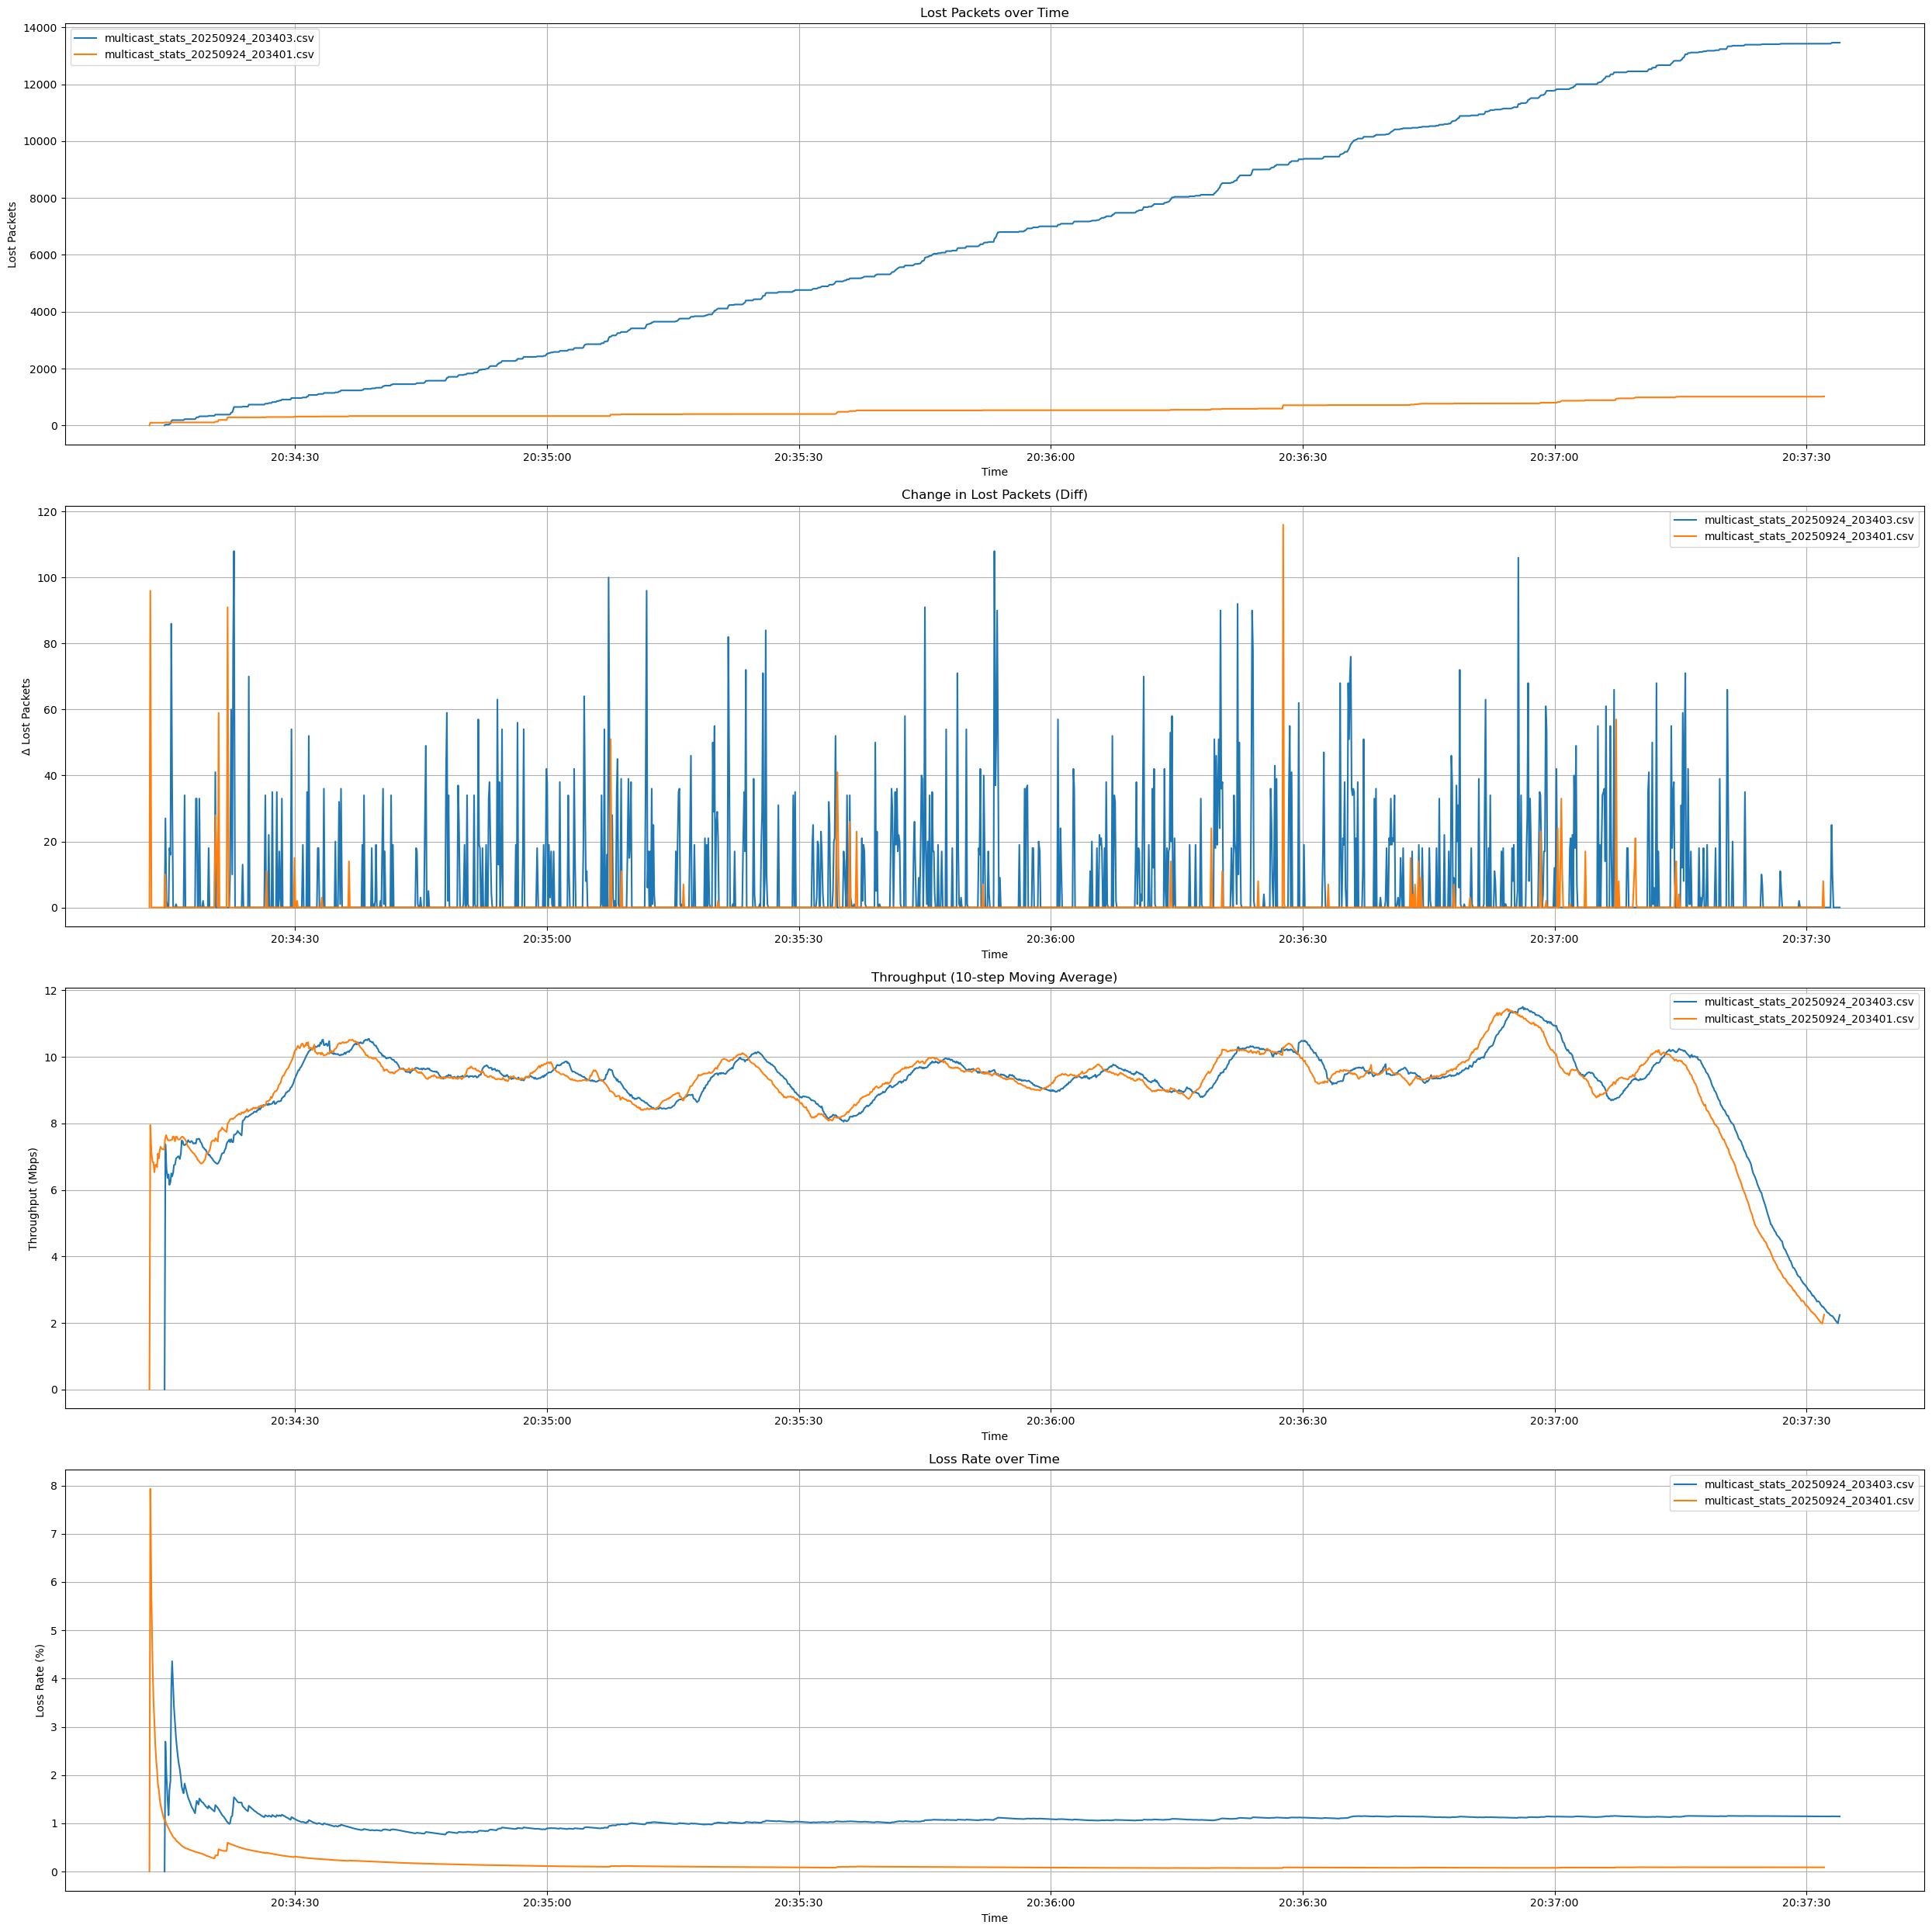

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# CSV 파일들이 들어있는 폴더 경로
folder_path = "./"   # 폴더 경로
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# 그래프 겹쳐서 그리기
plt.figure(figsize=(25, 25))

# 1. LostPackets
plt.subplot(4, 1, 1)
for file in csv_files:
    df = pd.read_csv(file)
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    if "LostPackets" in df.columns:
        plt.plot(df["Timestamp"], df["LostPackets"], label=f"{os.path.basename(file)}")
plt.xlabel("Time")
plt.ylabel("Lost Packets")
plt.title("Lost Packets over Time")
plt.legend()
plt.grid(True)

# 2. LostPackets diff
plt.subplot(4, 1, 2)
for file in csv_files:
    df = pd.read_csv(file)
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    if "LostPackets" in df.columns:
        df["LostPacketsDiff"] = df["LostPackets"].diff().fillna(0)
        plt.plot(df["Timestamp"], df["LostPacketsDiff"], label=f"{os.path.basename(file)}")
plt.xlabel("Time")
plt.ylabel("Δ Lost Packets")
plt.title("Change in Lost Packets (Diff)")
plt.legend()
plt.grid(True)

# 3. Throughput MA
plt.subplot(4, 1, 3)
for file in csv_files:
    df = pd.read_csv(file)
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    if "Throughput(Mbps)" in df.columns:
        df["ThroughputMA"] = df["Throughput(Mbps)"].rolling(window=100, min_periods=1).mean()
        plt.plot(df["Timestamp"], df["ThroughputMA"], label=f"{os.path.basename(file)}")
plt.xlabel("Time")
plt.ylabel("Throughput (Mbps)")
plt.title("Throughput (10-step Moving Average)")
plt.legend()
plt.grid(True)

# 4. LossRate
plt.subplot(4, 1, 4)
for file in csv_files:
    df = pd.read_csv(file)
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    if "LossRate(%)" in df.columns:
        plt.plot(df["Timestamp"], df["LossRate(%)"], label=f"{os.path.basename(file)}")
plt.xlabel("Time")
plt.ylabel("Loss Rate (%)")
plt.title("Loss Rate over Time")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [15]:
summary_list = []

for file in csv_files:
    df = pd.read_csv(file)
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])

    # 총 패킷 수: 마지막 행의 TotalPacket 컬럼 사용
    total_packets = None
    for col in df.columns:
        if "total" in col.lower() and "packet" in col.lower():
            total_packets = pd.to_numeric(df[col], errors="coerce").dropna().iloc[-1]
            break

    # 손실 패킷 수: LostPackets의 마지막 값 사용
    total_lost = None
    if "LostPackets" in df.columns:
        total_lost = pd.to_numeric(df["LostPackets"], errors="coerce").dropna().iloc[-1]

    # 마지막 LossRate 값 추출
    loss_rate_last = None
    for col in df.columns:
        if "lossrate" in col.lower():
            loss_rate_last = pd.to_numeric(df[col], errors="coerce").dropna().iloc[-1]
            break
            
    summary_list.append({
        "File": os.path.basename(file),
        "TotalPackets": int(total_packets) if total_packets is not None else None,
        "TotalLostPackets": int(total_lost) if total_lost is not None else None,
        "FinalLossRate(%)": round(loss_rate_last, 3) if loss_rate_last is not None else None
    })

summary_df = pd.DataFrame(summary_list)

print("\n----------[Total Result]----------")
print(summary_df)


----------[Total Result]----------
                                  File  TotalPackets  TotalLostPackets  \
0  multicast_stats_20250924_203403.csv       1178964             13461   
1  multicast_stats_20250924_203401.csv       1174191              1020   

   FinalLossRate(%)  
0             1.142  
1             0.087  
